<a href="https://colab.research.google.com/github/Theophine/Machine_Learning/blob/master/Gender_voice_prediction_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
sns.set(style='darkgrid')

#Read the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


In [ ]:
import pandas as pd
import io
voice_df = pd.read_csv(io.BytesIO(uploaded['voice.csv']))

#inspect dataframe 

In [ ]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
voice_df.shape

(3168, 21)

In [ ]:
voice_df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Overall, all the variables are numeric which means we do not have to create any form of dummy variables. All we need to do is label encode the target 

#Data wrangling stage

In [ ]:
#make a copy of the original dataframe 
df = voice_df.copy()

##check for missing values 

In [ ]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

NOTE: There were some variables with zero but given that I do not have domain knowledge about the dataset, I will not manipulate the variables because those values could be correct. 

##check for outliers

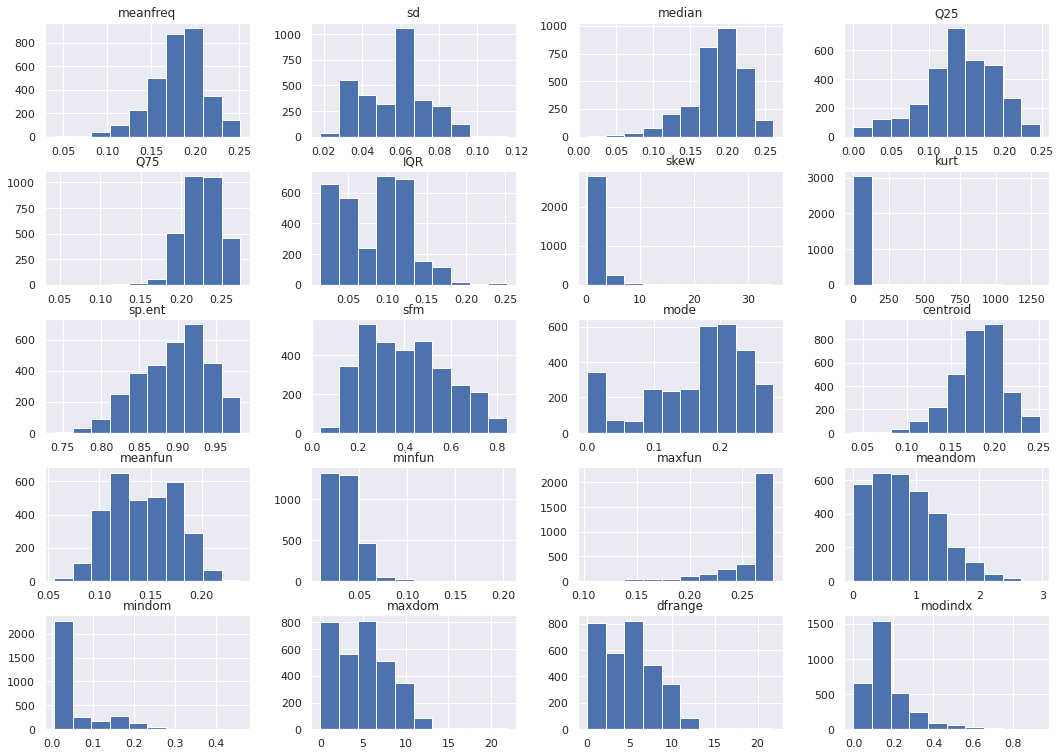

In [ ]:
df.hist(figsize = (18, 13));

from the above histograms, Centroid seems to have just one value and thus will not be of any use in our prediction. It has to be dropped. 

dfrange seems to have outliers. It will be inspected.

In [ ]:
del(df['centroid'])

In [ ]:
#check that centriod is deleted
df.head(1)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.0,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.0,0.0,male


In [ ]:
#inspect the dfrange variable for outlier
df['dfrange'].kurtosis()

1.318012673876241

Based on the result returned by the Kurtosis, there is not outlier in the variable called, dfrange

#Data visualization stage

In [ ]:
columns = df.drop(columns = 'label', axis = 1).columns.tolist()

def plot_box(cols, dataframe):
  for variable in cols:
    fig = plt.figure(figsize = (10, 5))
    ax = fig.gca()
    ax = sns.boxplot(x = 'label', y = variable, data = dataframe)
    plt.title('plot of Label vs ' + str(variable))
    plt.show()

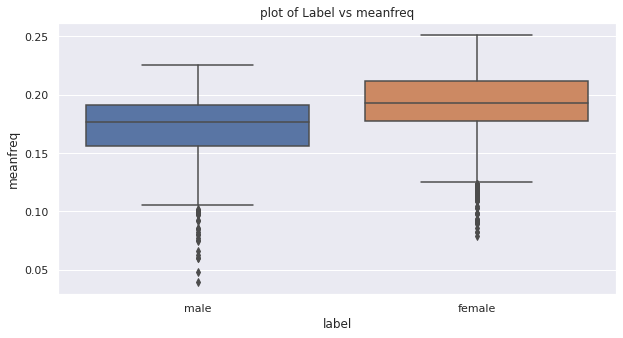

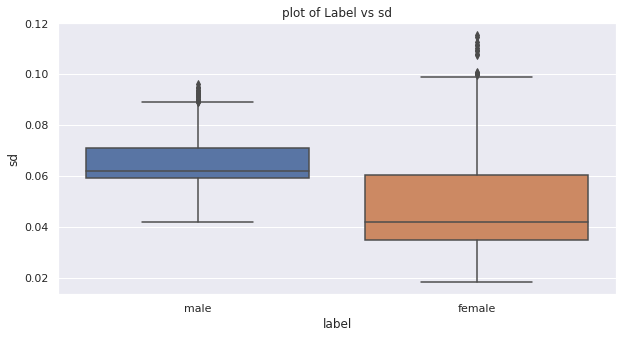

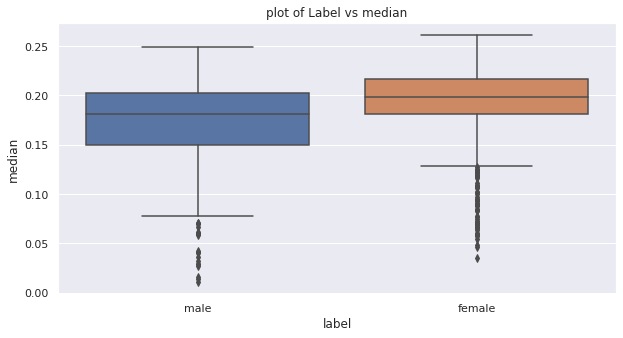

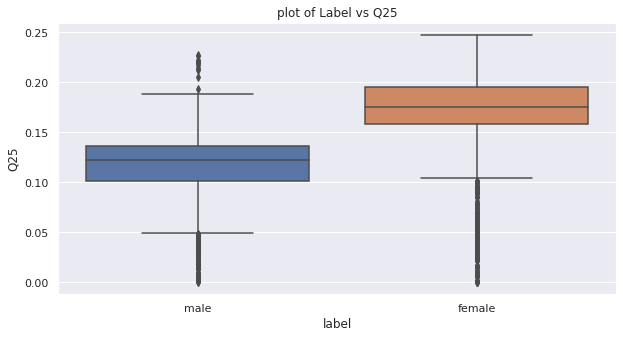

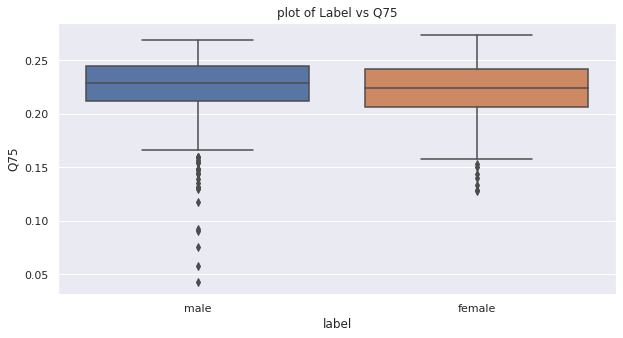

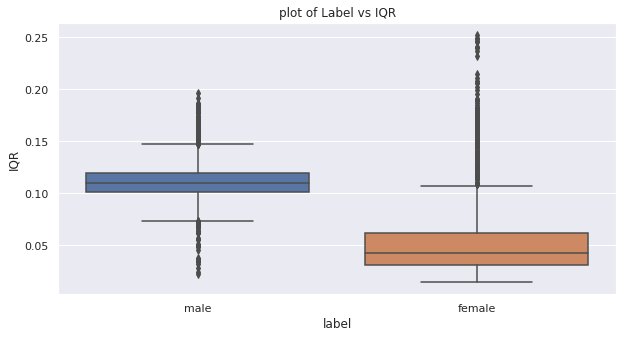

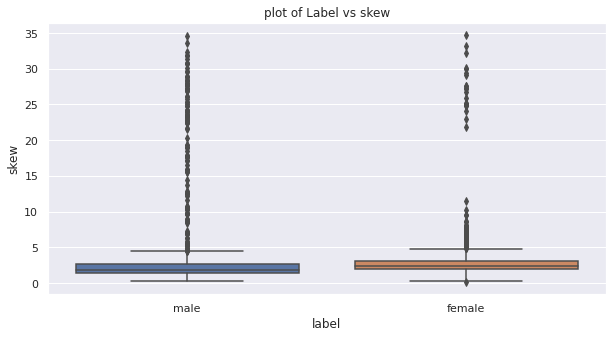

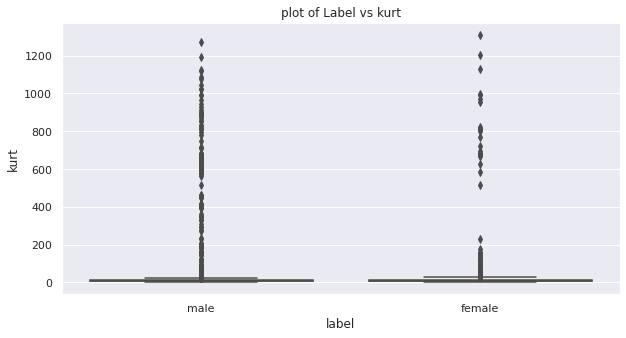

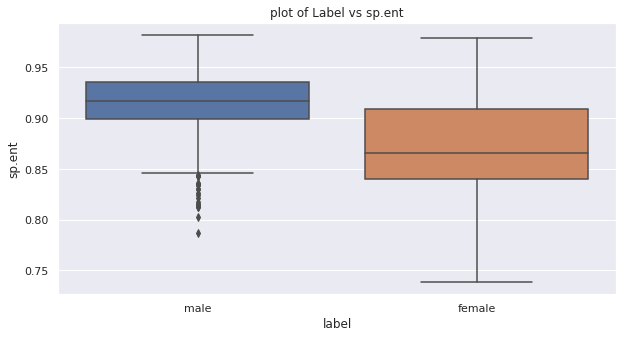

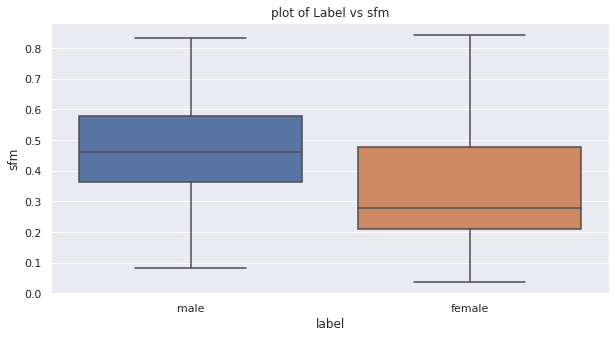

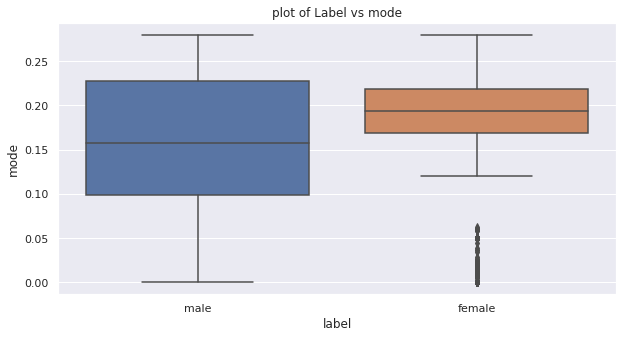

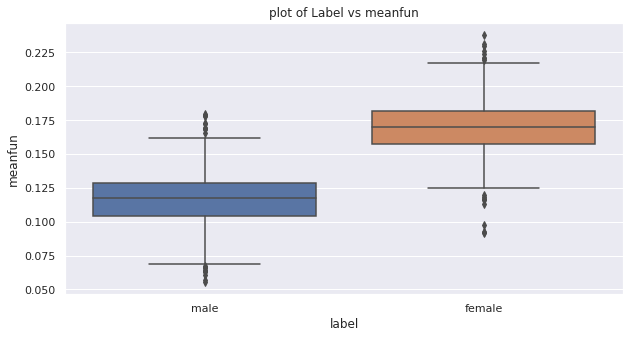

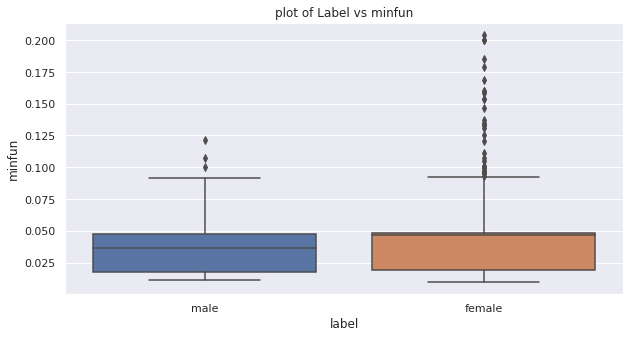

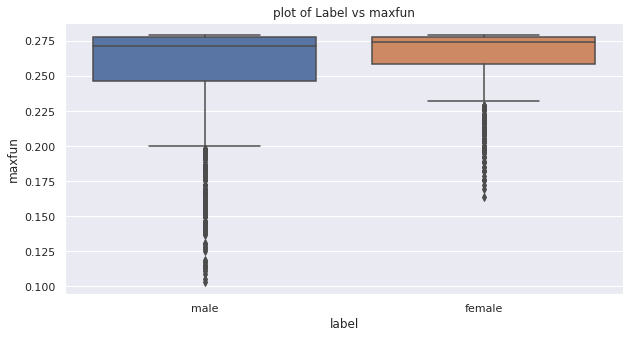

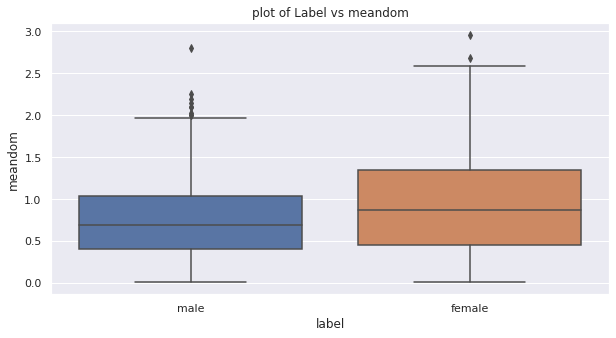

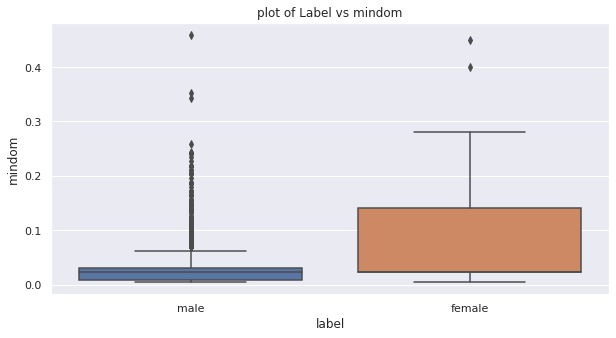

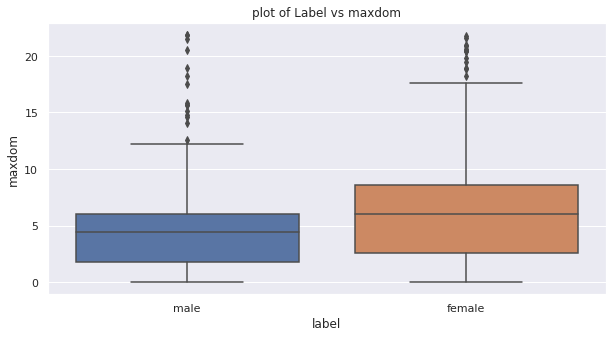

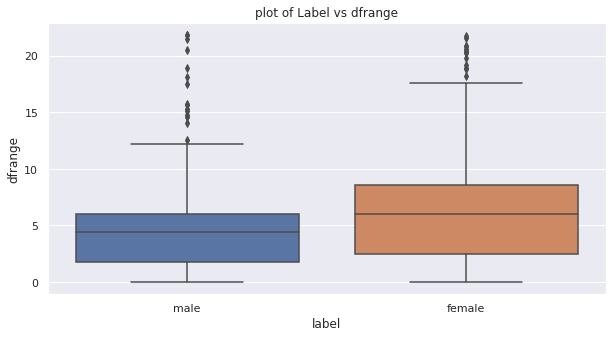

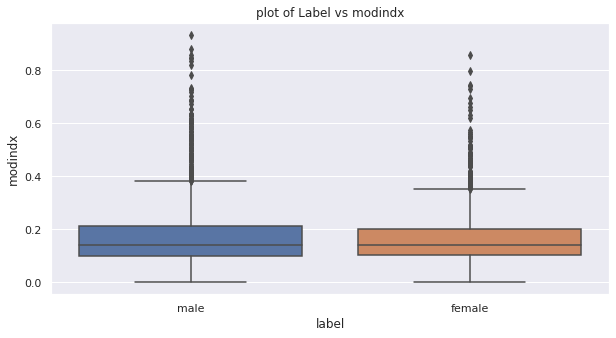

In [ ]:
plot_box(columns, df)

##observation 
from the above plot, the variables 'Kurt' and 'modinx' have the same median and thus would not be significant in the prediciton. but I will use the feature_selection algorithm to eliminate them. 

##check for data imbalance 

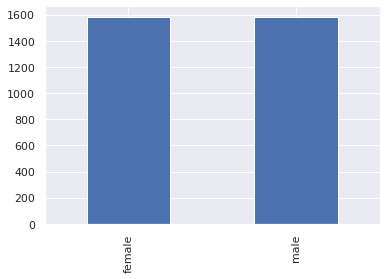

In [ ]:
df['label'].value_counts().plot.bar();

Observation: the data are balanced

In [ ]:
from mlxtend.plotting import plot_decision_regions    #for plotting the decision region 
from sklearn.neighbors import KNeighborsClassifier    #classifier 
from sklearn.feature_selection import SelectKBest, chi2, f_classif   # for selecting the best features 
from sklearn.metrics import make_scorer  #for setting our scoring parameter 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline   #our pipeline 
from sklearn.impute import SimpleImputer
from sklearn.utils import resample   #for data balancing 
from sklearn.preprocessing import StandardScaler   #for scaling all the datapoints 
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier


#split dataset

In [ ]:
X = df.drop('label', axis = 1)
y = df['label']

In [ ]:
#encode the label 
y = LabelEncoder().fit(y).transform(y)

In [ ]:
X.shape, y.shape

((3168, 19), (3168,))

#Plot decision boundary 

In [ ]:
#define scorer and split
scorer = make_scorer(f1_score, average = 'weighted')
k_split = StratifiedKFold(n_splits = 7,shuffle = True)

In [ ]:
x_decision = X[X.columns[SelectKBest(k = 4).fit(X, y).get_support()]]
x_decision.head()

,Q25,IQR,sp.ent,meanfun
0,0.015071,0.075122,0.893369,0.084279
1,0.019414,0.073252,0.892193,0.107937
2,0.008701,0.123207,0.846389,0.098706
3,0.096582,0.111374,0.963322,0.088965
4,0.078720,0.127325,0.971955,0.106398


In [ ]:
x_dec = x_decision.loc[:, ['Q25', 'IQR']]

In [ ]:
#convert both the x_array and y to array 
x_array = np.array(x_dec)
y_array = np.array(y)

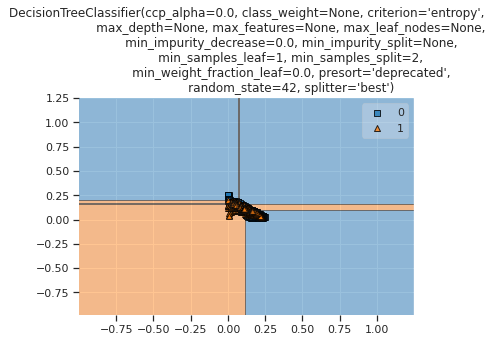

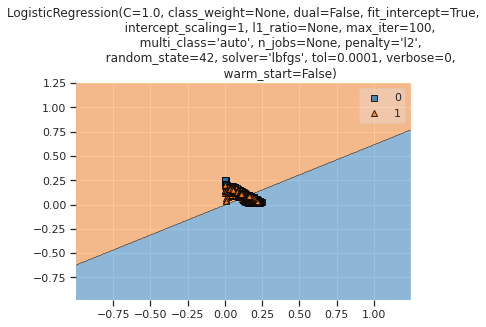

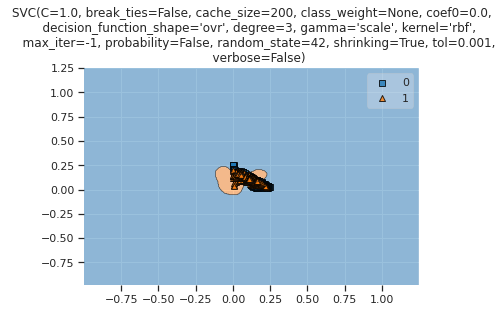

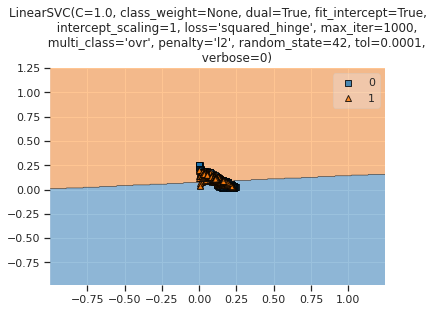

In [ ]:
classifiers = [DecisionTreeClassifier(criterion = 'entropy', random_state = 42), LogisticRegression(random_state = 42), SVC(random_state = 42), LinearSVC(random_state= 42)]

for classifier in classifiers: 
  classifier.fit(x_array, y_array)
  plot_decision_regions(x_array, y_array, classifier)
  plt.title(str(classifier))
  plt.show();

##Use cross validation to get a better scence of whats which model will perform best overall

In [ ]:
for classifier in classifiers:
  score = np.mean(cross_val_score(classifier, X, y, scoring = scorer, cv = k_split, n_jobs = -1))
  print('the score of the classifier ' + str(classifier) + ' is ' + str(score))
  print(' ')

the score of the classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best') is 0.9687538589282242
 
the score of the classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.8836557063202031
 
the score of the classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree

from the above, the decision tree classifier will outperform other classifier. However, the result of the LinearSVC is almost as good as the decision tree classifier. 

#split data into train test set 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
steps = [('k_best', SelectKBest()), ('scaler', StandardScaler()), ('imp', SimpleImputer()), ('dt', DecisionTreeClassifier(criterion = 'entropy', random_state = 42))]


In [ ]:
pipeline = Pipeline(steps)

##model training without hyperparameter tuning

In [ ]:
#At first, I will run the model without tuning the hyperparameters 
pipeline_fit = pipeline.fit(X_train, y_train)

In [ ]:
pipeline_fit.score(X_train, y_train), pipeline_fit.score(X_test, y_test)

(1.0, 0.957983193277311)

In [ ]:
#observation: given that the accuracy of the train dataset is perfect, that is a possible indication of overfitting 
#Thus we need to tune the model 

##model training with tuned hyperparameters - ccp_alpha

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#define your tuning parameters 
params = {'dt__ccp_alpha': np.linspace(0, 1, num = 30)}

In [ ]:
gridsearch = GridSearchCV(pipeline, param_grid= params, scoring = scorer, n_jobs = -1, cv = k_split, return_train_score= True)
grid_result = gridsearch.fit(X_train, y_train)
print(grid_result.best_params_)

cv_result = pd.DataFrame(grid_result.cv_results_)
np.mean(cv_result['mean_train_score']), np.mean(cv_result['mean_test_score'])



{'dt__ccp_alpha': 0.0}


(0.7926835740075597, 0.7904102100138672)

##model training with tuned hyperparameters - ccp_alpha and max_features

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#define your tuning parameters 
params_cf = {'dt__ccp_alpha': np.linspace(0, 1, num = 30), 'dt__max_features': np.arange(1, len(X_train.columns), 1)}

In [ ]:
gridsearch_cf = GridSearchCV(pipeline, param_grid= params_cf, scoring = scorer, n_jobs = -1, cv = k_split, return_train_score= True)
grid_result_cf = gridsearch_cf.fit(X_train, y_train)
print(grid_result_cf.best_params_)

cv_result_cf = pd.DataFrame(grid_result_cf.cv_results_)
np.mean(cv_result_cf['mean_train_score']), np.mean(cv_result_cf['mean_test_score'])

{'dt__ccp_alpha': 0.0, 'dt__max_features': 10}


(0.6403211610541923, 0.6368502473477349)

the above reduces the model accuracy 

model training with tuned hyperparameters - ccp_alpha,  min_sample_split 

In [ ]:
#define your tuning parameters 
params_cm = {'dt__ccp_alpha': np.linspace(0, 1, num = 30), 'dt__min_samples_split': np.arange(1, 200, 1)}

In [ ]:
gridsearch_cm = GridSearchCV(pipeline, param_grid= params_cm, scoring = scorer, n_jobs = -1, cv = k_split, return_train_score= True)
grid_result_cm = gridsearch_cm.fit(X_train, y_train)
print(grid_result_cm.best_params_)

cv_result_cm = pd.DataFrame(grid_result_cm.cv_results_)
np.mean(cv_result_cm['mean_train_score']), np.mean(cv_result_cm['mean_test_score'])

{'dt__ccp_alpha': 0.0, 'dt__min_samples_split': 15}


(0.791650869181308, 0.7893390434915454)

From the above, using min_sample_split and ccp alpha, improved the model

##model prediction 

In [ ]:
y_pred = gridsearch_cm.predict(X_test)
y_pred_proba = gridsearch_cm.predict_proba(X_test)

we will vary the threshold to say 0.6 in order to increase the amount of False negative and decrease False positive 

In [ ]:
[s[1] > 0.6 for s in y_pred_proba] == y_pred


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

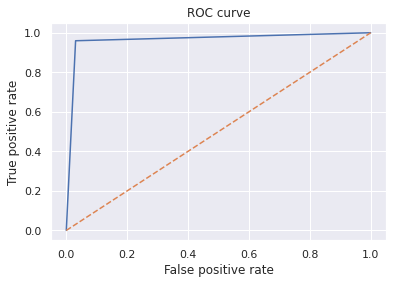

 
The auc_score is  0.964473242225483


In [ ]:
#plot the confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, [s[1] > 0.6 for s in y_pred_proba])

plt.plot(fpr, tpr)
plt.plot([0,1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show();
print(' ')
print('The auc_score is ', roc_auc_score(y_test, [s[1] > 0.6 for s in y_pred_proba]))

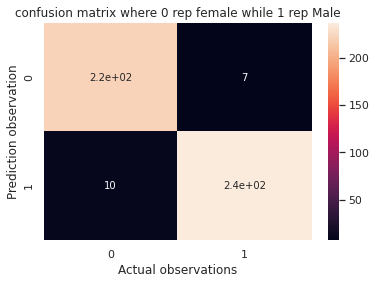

In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, [s[1] > 0.6 for s in y_pred_proba])), annot = True)
plt.xlabel('Actual observations');
plt.ylabel('Prediction observation');
plt.title('confusion matrix where 0 rep female while 1 rep Male');
plt.show();

In [ ]:
#classificaiton report 
print(classification_report(y_test, [s[1] > 0.6 for s in y_pred_proba]))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       229
           1       0.97      0.96      0.97       247

    accuracy                           0.96       476
   macro avg       0.96      0.96      0.96       476
weighted avg       0.96      0.96      0.96       476



#plot decision tree

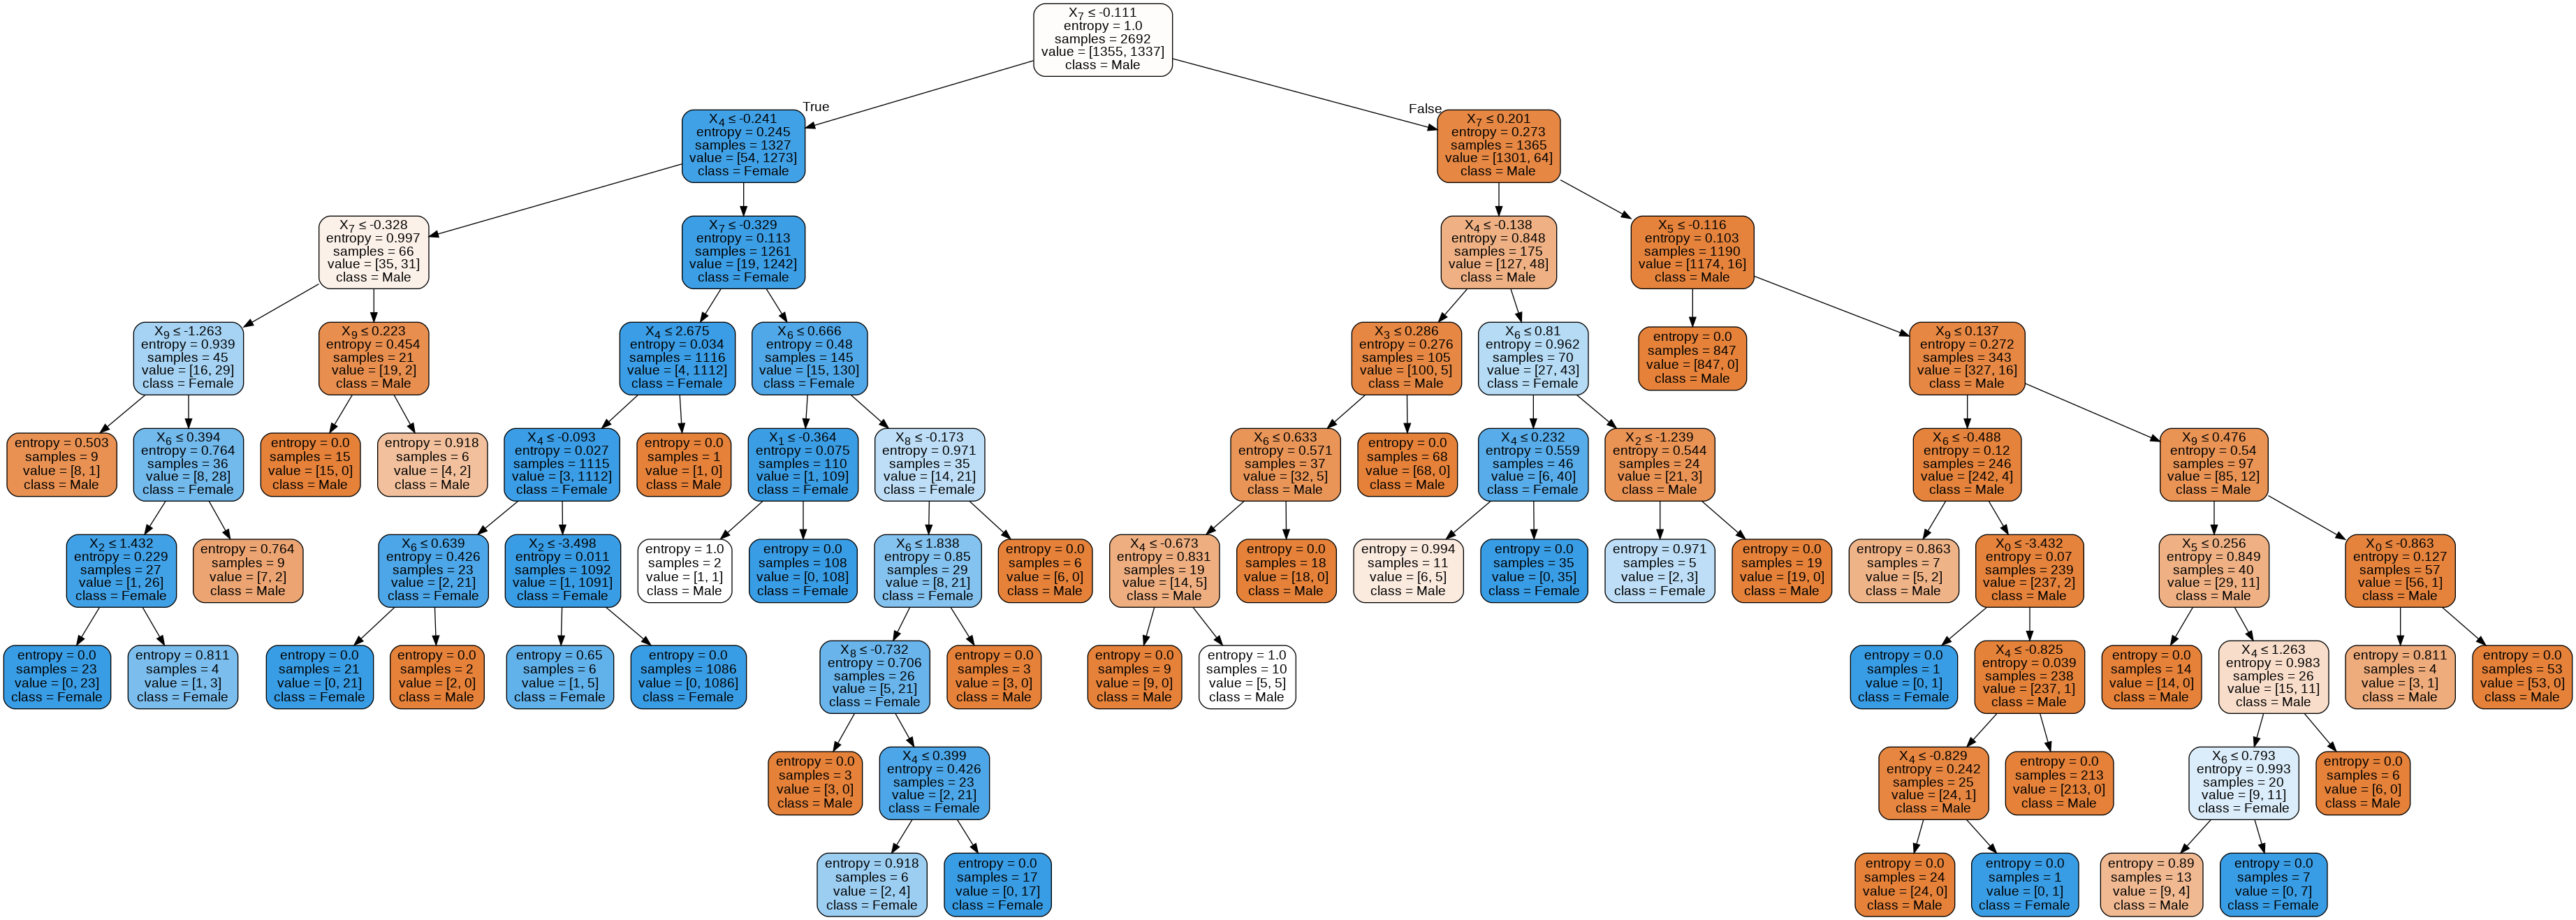

<Figure size 540x360 with 0 Axes>

In [ ]:
import pydotplus #pip install pydotplus if it does not exist
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
dot_data = StringIO()

plt.figure(dpi = 90);

export_graphviz(grid_result_cm.best_estimator_[3], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names = ['Male', 'Female'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())